In [1]:
from sim.system_models.vehicle_systems.tire_model import TireModel
from sim.model_parameters.cars.lady_luck import LadyLuck

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
tire_model = TireModel()
lady_luck = LadyLuck()
tire_model.lat_coeffs = lady_luck.rear_tire_coeff_Fy
tire_model.long_coeffs = lady_luck.rear_tire_coeff_Fx

slip_ratios = np.linspace(-0.10, 0.10, 31)
slip_angles = np.linspace(-15 * np.pi / 180, 15 * np.pi / 180, 31)
normal_loads = np.array([500])
colors = np.array(["r", "g", "b"])

SR_dict = dict()
SA_dict = dict()

for slip_ratio in slip_ratios:
    SR_dict[slip_ratio] = []

for slip_angle in slip_angles:
    SA_dict[slip_angle] = []

In [3]:
inclination_angle = 0

outputs = []
for load in normal_loads:
    for slip_angle in slip_angles:
        for slip_ratio in slip_ratios:
            comstock_output = tire_model._get_comstock_forces(SA = slip_angle, SR = slip_ratio, FZ = load, IA = inclination_angle)
            SR_dict[slip_ratio].append([comstock_output[0] / load, comstock_output[1] / load])
            SA_dict[slip_angle].append([comstock_output[0] / load, comstock_output[1] / load])

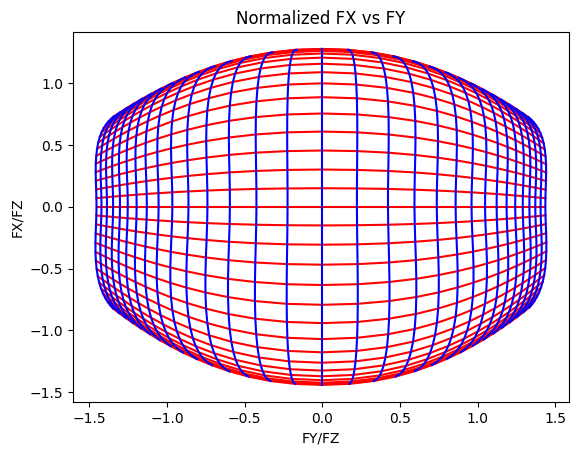

In [4]:
for slip_ratio in SR_dict:
    forces = [[], []]
    slip = slip_ratio
    for force in SR_dict[slip_ratio]:
        forces[0].append(force[0])
        forces[1].append(force[1])
    
    plt.plot(forces[1], forces[0], 'r')
    
for slip_angle in SA_dict:
    forces = [[], []]
    slip = slip_angle
    for force in SA_dict[slip_angle]:
        forces[0].append(force[0])
        forces[1].append(force[1])
    
    plt.plot(forces[1], forces[0], 'b')
    
plt.xlabel("FY/FZ")
plt.ylabel("FX/FZ")
plt.title("Normalized FX vs FY")
plt.show()

In [5]:
# Setup

model_SA_data = np.linspace(-np.pi / 2, np.pi / 2, 1000)
model_SR_data = np.linspace(-1, 1, 1000)

SA, SR = np.meshgrid(model_SA_data, model_SR_data)

FX = tire_model._get_comstock_forces(SA, SR, 500, 0)[0]
FY = tire_model._get_comstock_forces(SA, SR, 500, 0)[1]

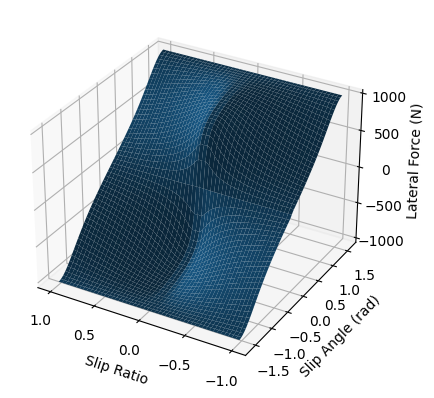

In [6]:
# Lat

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

ax = plt.axes(projection='3d')

fig.add_axes(ax)
ax.plot_surface(SR, SA, FY)

ax.set_xlabel('Slip Ratio')
ax.set_ylabel('Slip Angle (rad)')
ax.set_zlabel('Lateral Force (N)')

ax.invert_xaxis()

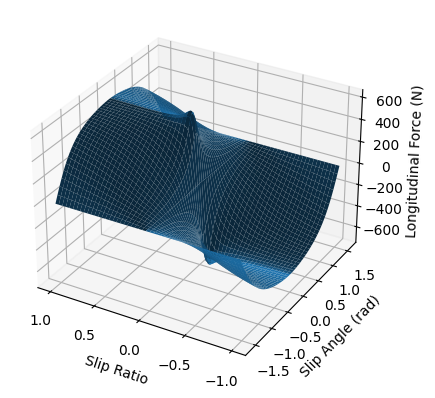

In [7]:
# Long

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

ax = plt.axes(projection='3d')

fig.add_axes(ax)
ax.plot_surface(SR, SA, FX)

ax.set_xlabel('Slip Ratio')
ax.set_ylabel('Slip Angle (rad)')
ax.set_zlabel('Longitudinal Force (N)')
ax.invert_xaxis()

In [8]:
SA = -30
SR = -10

forces = tire_model._get_comstock_forces(SA * np.pi / 180, SR / 100, 500, 0)

print(forces[1], forces[0])

-843.52694076035 -225.923740854273
